### 머신러닝 맛보기

In [1]:
### exe) 생선 분류하기 : 도미와 빙어 분류하기 (도미 찾기)
# -생선을 자동으로 찾아주는 머신러닝 만들기


### 생선을 분류하기 위해 필요한 특징이 될 데이터 확인하기
# - 특징을 알면 쉽게 분류할 수 있습니다.
# - 생선은 무게와 길이 데이터를 최초에 수집해 놓고 있습니다.

#### sklearn은 <<<< 2차원 , 1차원 >>>>


In [2]:
### 데이터 가지고 오기
# - 도미 데이터

# - 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]

# - 도미 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [3]:
print("bream_length = ",bream_length)
print('-----------------------------------------------------------------------------------')
print("bream_weight = ",bream_weight)
print('-----------------------------------------------------------------------------------')
print(len(bream_length), len(bream_weight))

bream_length =  [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
-----------------------------------------------------------------------------------
bream_weight =  [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
-----------------------------------------------------------------------------------
35 35


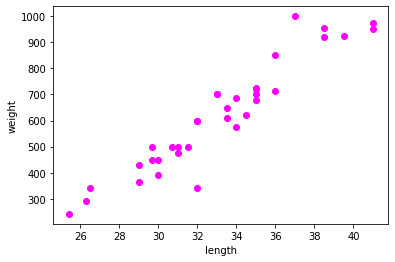

In [4]:
### 데이터의 특징간의 분포 확인하기
# - 선형관계인지 비선형 관계인지 확인하기
import matplotlib.pyplot as plt

# 산점도로 표현하기 (scatter(x,y))
plt.scatter(bream_length,bream_weight,c='magenta')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
### 데이터 가지고 오기
# - 빙어 데이터

# - 빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# - 빙어 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [6]:
print("smelt_length = ",smelt_length)
print('-----------------------------------------------------------------------------------')
print("smelt_weight = ",smelt_weight)
print('-----------------------------------------------------------------------------------')
print(len(smelt_length), len(smelt_weight))

smelt_length =  [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
-----------------------------------------------------------------------------------
smelt_weight =  [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
-----------------------------------------------------------------------------------
14 14


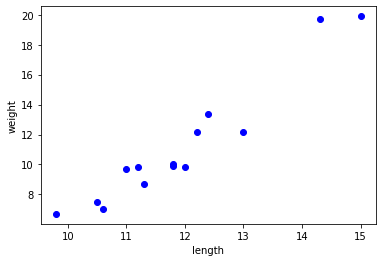

In [7]:
# 산점도로 표현하기 (scatter(x,y))
plt.scatter(smelt_length,smelt_weight,c='blue')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

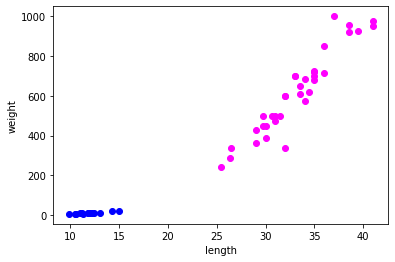

In [8]:
plt.scatter(bream_length,bream_weight,c='magenta')
plt.scatter(smelt_length,smelt_weight,c='blue')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 해석 결과
# 분홍색 : 도미 , 파랑색 : 빙어
# 도미와 빙어는 길이에 비례해서 무게가 증가하는 것으로 보임
# 다만, 빙어의 경우, 길이에 비례해서 크게 무게가 증가되지는 않는다.
# 빙어는 무게에 비해 길이의 영향을 덜 받는것으로 보인다.

### 머신러닝 프로그래밍
#### - 첫번째 모델 : 가장 간단한 모델 사용(분류와 회귀가 가능한 모델)
#### - K-최근접 이웃(K-Nearest Neighbors, KNN) 알고리즘 사용 
#### - 도미와 빙어 데이터를 통해 패턴을 찾아서 알고리즘 완성하기
#### - 완성된 알고리즘으로 예측하기
#### -  위 과정을 알아서 진행 ← 머신러닝

In [9]:
# 데이터 합치기(독립변수들을 합치기)
# 도미와 빙어의 길이는 길이끼리, 무게는 무게끼리 합쳐서 하나의 데이터셋 만들기

# 도미와 빙어의 길이 데이터 합치기
# 리스트 합치기 + 연산자 
length = bream_length+smelt_length

# 도미와 빙어 무게 데이터 합치기
weight = bream_weight+smelt_weight

print(length)
print(weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [10]:
### 길이와 무게를 하나의 데이터세트로 만들기
# - 사이킷런 라이브러리는 2차원 데이터세트를 사용해야 합니다
# [[길이,무게],[길이,무게],[길이,무게],,,,,]

fish_data = []

for i in range(0,len(length),1):
    data = [length[i],weight[i]]
    fish_data.append(data)
    
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [11]:
# 각각다른 리스트를 넣어주면 zip함수가 각각 리스트 0번째 인덱스값부터 차례로 하나씩가져온다 
# 한번에 여러개의 리스트에서 0번째 인덱스 값부터 하나씩 추출 
zip(length, weight)

In [12]:
### 리스트 내포 프로그램 : list comprehension 이라고 합니다
# zip() : 각각의 리스트 안에서 각 인덱스의 쌍을 반환해 줍니다.
# 반복은 zip() 함수가 반환해주는 갯수만큼 반복수행 

fish_data = [[len,wei] for len, wei in zip(length, weight)] # 리스트 comprehension 리스트안에서 프로그래밍 
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [13]:
### 정답 데이터세트 만들기 (종속변수 Y)
# - 정답 변수는 1차원 리스트로 별도로 만들어야 함
# - 정답 변수의 갯수는 독립변수의 갯수와 동일해야 합니다.
# - 도미 : 1 , 빙어 :0 
# 찾고자 하는 데이터를 1로 둔다 (두개의 데이터가 있을 때)


In [14]:
### 정답변수 생성하기
# 변수명 : fish_target
# 형태 : 1차원
# 예시 : [1,1,1,1,...0.0.0]


# 리스트에 1을 35개 0을 14개 넣기 --- 방법1
fish_target = []

for i in range(0,35,1):
    fish_target.append(1)
print(len(fish_target))
for j in range (0,14,1) :
    fish_target.append(0)

print(fish_target)
print(len(fish_target))

35
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
49


In [15]:
# 리스트에 1을 35개 0을 14개 넣기 --- 방법2
fish_target2 = []
for i in range(0,49,1) :
    if i <35 :
        fish_target2.append(1)
    else :
        fish_target2.append(0)
        
print(fish_target2)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
# 리스트에 1을 35개 0을 14개 넣기 --- 방법3
fish_target3 = [1]*35 + [0]*14
print(fish_target3)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [17]:
### 머신러닝 시작하기
# 알고리즘 :k-최근접 이웃 알고리즘(KNN)
# 사용 패키지 :sklearn
# 사용 클래스(모델) : KNeighborsClassifier

아래 실행시 skleran 모듈 없다는 오류 발생시
다음으로 설치하기
(아나콘다 기준)
### conda install -c conda-forge scikit-learn
위에 안될 경우
### conda install scikit-learn
안되면 가상환경 만들기 전에 아래먼저 진행하고 다시 만들기
### conda update -n base conda
### python -m pip install --upgrade pip  *파이썬만
### conda update --all



In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# class 객체 생성하기 : 주소 받아오기
# 객체변수 : kn
# class 생성자 호출
kn = KNeighborsClassifier()
kn

KNeighborsClassifier()

In [20]:
### 모델 학습하기(훈련 - training)
# 훈련모델 생성하기 : fit(독립변수 데이터 세트, 종속변수 데이터 세트)
# - 학습모델 또는 훈련모델이라고 명칭합니다
# - 독립변수 즉 훈련데이터 세트를 훈련시킨다고 합니다
# - 사용되는 훈련데이터 변수명 : train_x or train_data, 
#            정답데이터 변수명 : train_target or train_y
# - 사용되는 테스트데이터 변수명 : test_data, test_x
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [21]:
### 훈련모델 평가하기 
# 훈련을 잘했는지 점수로 나타냅니다
# 결과값을 보통 '정확도' 라고 합니다 

# score 내부 실행 순서
# predict() 예측 수행
# 정확도 계산 값 반환
# - 정확도 = 정답갯수 / 전체갯수
# 결과값은 0~1사이의 실수값 또는 정수값
# 1이면 100% 정확도 0이면 이면 0% 정확도, 0.5이면 50% 정확도
# 1에 가까울 수록 정확도가 높다 
# 다른 모델에서는 정확도를 accuracy라는 이름으로 조회도 됩니다 
# 앞에 데이터를 분석해서 값이 나온것을 뒤에 데이터와 비교하여 얼마나 맞는지 비교해서 정확도 산출 
# fish_data를 분석해서 ->[1,1,1,1,,,0,0,,] 나온 결과값과 fish_target(정답)을 비교 
kn.score(fish_data, fish_target) 

C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

### k-최근접 이웃 알고리즘 정리
#### - 어떤 데이터에 대한 답을 구할 떄, 주위의 다른 데이터를 보고, 다수를 차지하는 쪽으로 정답을 예측
#### - 주위의 데이터로 현재 예측 데이터를 판단

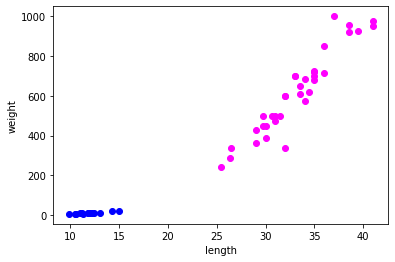

In [22]:
plt.scatter(bream_length,bream_weight,c='magenta')
plt.scatter(smelt_length,smelt_weight,c='blue')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


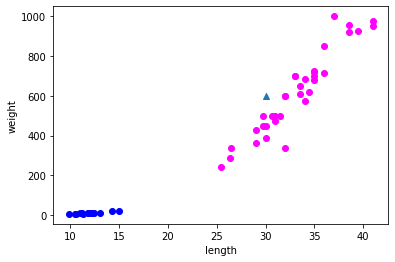

In [23]:

plt.scatter(bream_length,bream_weight,c='magenta')
plt.scatter(smelt_length,smelt_weight,c='blue')
plt.scatter(30,600,marker='^' )
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [25]:
### 새로운 데이터 예측하기 : predic()함수 사용
# predict() 함수에 사용되는 값은 새로운 독립변수의 값을 사용
# - 사용되는 값은 1개,
# - 사용된 값에 대한 예측값(정답)을 알려줍니다
# - 훈련할때 이용했던 데이터 형태와 똑같은값 사용해야
kn.predict([[30,600]]) # 1의 값이 나왓으므로 도미라고 예측 

C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

In [26]:
### KNN 알고리즘 위해서는 데이터만 잘 준비해서 저장해두면 된다
# 클래스(모델) 내부의 멤버 변수에 전체 데이터가 저장되어 있다
# - 전체 데이터 = 독립변수, 종속변수 각각 변수에 저장되어있다
# - 예측 할 독립변수를 넣어주면, 모델이 가지고 있는 전체 데이터에서 가장 가까운 거리의 데이터가 속한 종속변수 값을 알려주는 방식
# [단점]  데이터가 많은 경우 CPU , RAM 사양이 좋아야 합니다

In [27]:
# 모델 안에 훈련데이터 있는지 확인
 # 클래스 내부에 fit_x라는 멤버변수 

In [28]:
#모델이 가지고 있는 훈련데이터
kn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [29]:
# 모델이 가지고 있는 정답데이터
kn._y
    

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [30]:
### 최근접 이웃은 몇개를 기준으로??
# 기본값은 5
# 예측을 위해 사용된 데이터의 근거리 5개를 기준으로 기본적으로 가장 가까운 직선거리의 데이터가 속한 종속변수의 값을 알려줌 
# n-neighbors = 5 라고 정의합니다
# 클래스(모델) 생성시에 기준갯수를 지정합니다
# 지정된 갯수를 이용해서 훈련을 하고, 예측합니다
# 최근접 이웃 알고리즘 모델은 갯수가 늘어날수록 정확도가 떨어진다 

In [31]:
### 이웃의 갯수 20개를 기준갯수로 정한 후 훈련 및 예측해보기
kn20 = KNeighborsClassifier(n_neighbors=20)
kn20

KNeighborsClassifier(n_neighbors=20)

In [32]:
kn20.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=20)

In [33]:
kn20.score(fish_data, fish_target)

C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9795918367346939

In [34]:
# [문제]
# 가장 적합한 n_neighbors 갯수 찾기
# 1보다 작아지기 전까지의 갯수의 값을 찾으시면 됩니다 

In [35]:
for i in range (1,50,1):
    kn_n = KNeighborsClassifier(n_neighbors=i)
    kn_n.fit(fish_data, fish_target)  
    print(i, ':' , kn_n.score(fish_data, fish_target))

C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or 

C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or 

1 : 1.0
2 : 1.0
3 : 1.0
4 : 1.0
5 : 1.0
6 : 1.0
7 : 1.0
8 : 1.0
9 : 1.0
10 : 1.0
11 : 1.0
12 : 1.0
13 : 1.0
14 : 1.0
15 : 1.0
16 : 1.0
17 : 1.0
18 : 0.9795918367346939
19 : 0.9795918367346939
20 : 0.9795918367346939
21 : 0.9795918367346939
22 : 0.9795918367346939
23 : 0.9795918367346939
24 : 0.9795918367346939
25 : 0.9795918367346939
26 : 0.9795918367346939
27 : 0.9795918367346939
28 : 0.9591836734693877
29 : 0.7142857142857143
30 : 0.7142857142857143
31 : 0.7142857142857143
32 : 0.7142857142857143
33 : 0.7142857142857143
34 : 0.7142857142857143
35 : 0.7142857142857143
36 : 0.7142857142857143
37 : 0.7142857142857143
38 : 0.7142857142857143
39 : 0.7142857142857143
40 : 0.7142857142857143
41 : 0.7142857142857143
42 : 0.7142857142857143
43 : 0.7142857142857143
44 : 0.7142857142857143
45 : 0.7142857142857143
46 : 0.7142857142857143
47 : 0.7142857142857143
48 : 0.7142857142857143
49 : 0.7142857142857143


C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
nCnt =0

for n in range(1, len(fish_data)):
    kn.n_neighbors=n
    score = kn.score(fish_data, fish_target)
    if score < 1 :
        nCnt = n-1
        print('nCnt = ' , nCnt)
        break
        

nCnt =  17


C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\82102\ml\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or 